<a href="https://colab.research.google.com/github/sid-vj/learningpandas/blob/main/OutlierTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from google.colab import drive
import statistics as st
import numpy as np

In [4]:
#Reading Data

data = pd.read_csv("raw_sales.csv")
print(data)

                  datesold  postcode   price propertyType  bedrooms
0      2007-02-07 00:00:00      2607  525000        house         4
1      2007-02-27 00:00:00      2906  290000        house         3
2      2007-03-07 00:00:00      2905  328000        house         3
3      2007-03-09 00:00:00      2905  380000        house         4
4      2007-03-21 00:00:00      2906  310000        house         3
...                    ...       ...     ...          ...       ...
29575  2019-07-25 00:00:00      2900  500000         unit         3
29576  2019-07-25 00:00:00      2612  560000         unit         2
29577  2019-07-26 00:00:00      2912  464950         unit         2
29578  2019-07-26 00:00:00      2601  589000         unit         2
29579  2019-07-26 00:00:00      2612  775000         unit         2

[29580 rows x 5 columns]


In [7]:
def find_outliers(data):
  outliers = []

  #Calculating Std Dev & Mean.
  data_std_dev = st.stdev(data)
  data_mean = st.mean(data)

  #Setting Cutoff for outlier treatment.
  outlier_cut_off = data_std_dev * 3

  lower_limit = data_mean - outlier_cut_off
  upper_limit = data_mean + outlier_cut_off

  for anamoly in data:
    if anamoly > upper_limit or anamoly < lower_limit:
      outliers.append(anamoly)
  return outliers

In [8]:
list1= find_outliers(data['price'])

In [9]:
len(list1)

461

<Axes: xlabel='price', ylabel='Density'>

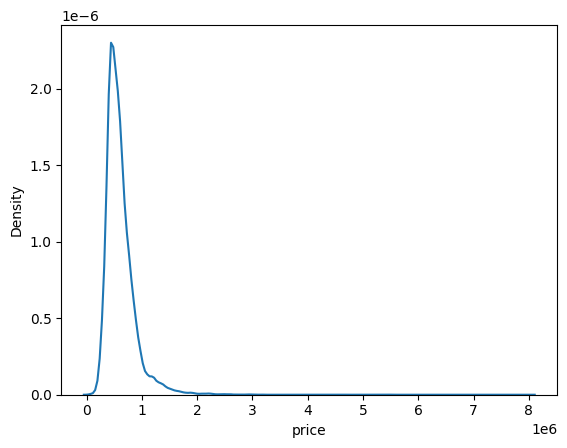

In [12]:
import seaborn as sns
sns.kdeplot(data.price)

In [15]:
data['price_transformed'] = np.log(data.price)
data['price_transformed'].skew()

np.float64(0.4731646269984763)

In [16]:
#Checking for outlier again

list2 = find_outliers(data['price_transformed'])

In [17]:
len(list2) #The amount of outliers have decreased.

266